# Setup the environment

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2

data = glob.glob('data/*.jpg')
images = np.array([np.array(Image.open(fname)) for fname in data])

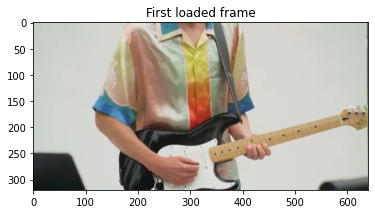

In [40]:
plt.title("First loaded frame")
plt.imshow(images[0])

# Pre-processing frames

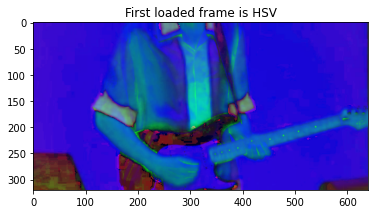

In [41]:
# Converting every frame from RGB to HSV
hsv = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2HSV) for img in images])

plt.title("First loaded frame is HSV")
plt.imshow(hsv[0])

# Computing motion vectors

In [225]:
MASK_OFFSET = 5

# returns best matching vector in mask traversal
def get_best_vector(px, px_pos, frame, size):
    height, width = size
    px_y, px_x = px_pos

    min_norm = np.Infinity
    min_vect = (0, 0)
    for y in range(px_y - MASK_OFFSET, px_y + MASK_OFFSET):
        for x in range(px_x - MASK_OFFSET, px_x + MASK_OFFSET):
            # out of bounds check
            if y < 0 or x < 0 or y >= height or x >= width:
                continue

            px_t = frame[y, x][0] # only checking hue from HSV
            if px == px_t:
                vect = (px_x - x, px_y - y)
                norm = np.linalg.norm(vect)
                if norm < min_norm:
                    min_norm = norm
                    min_vect = vect
            
            np.argwhere(np.min())

    return min_vect

# returns all motion vectors between two frames
def get_frame_px_diff(frame1, frame2, size):
    frame_motion = np.empty(shape = (size[0], size[1], 2))
    for y in range(size[0] - 1):
        for x in range(size[1] - 1):
            px = frame1[y, x][0] # only saving hue from HSV
            frame_motion[y, x] = get_best_vector(px, (y, x), frame2, size)
    return frame_motion

# returns motion vectors for each frame
def estimate_motion_px(hsv_frames):
    nb_frames = len(hsv_frames)
    height, width, _ = hsv_frames[0].shape
    motions = []
    for i in range(nb_frames - 1):
        if i > 10:
            return motions
        print("frame ", i)
        f1 = hsv_frames[i]
        f2 = hsv_frames[i + 1]
        frame_motion = get_frame_px_diff(f1, f2, (height, width))
        motions.append(frame_motion)
    return motions

In [226]:
# Compute pixel-wise motion vector for all frames
motions = estimate_motion_px(hsv)

frame  0
frame  1
frame  2


KeyboardInterrupt: 

### Displaying results

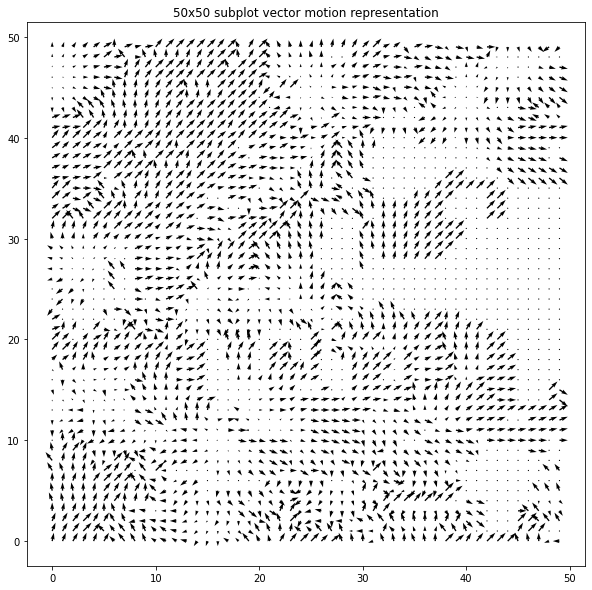

In [205]:
m = motions[0]

# Display vectors using quiver
min_x, min_y = 200, 200
max_x, max_y = 300, 300

plt.figure(figsize=(10, 10))
plt.quiver(m[min_y:max_y, min_x:max_x, 0], m[min_y:max_y, min_x:max_x, 1])
plt.title("50x50 subplot vector motion representation")
plt.show()